In [14]:
import pandas as pd

In [15]:
df=pd.read_csv('Housing.csv')
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [16]:
print(df.shape)

(545, 13)


In [17]:
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [18]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [19]:
x=df.drop('price',axis=1)
y=df['price']


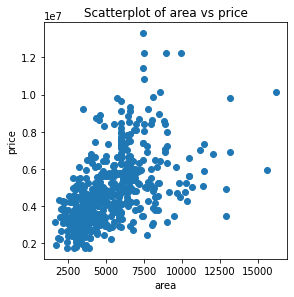

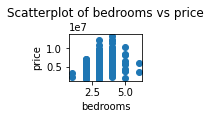

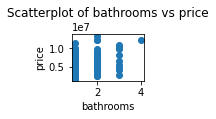

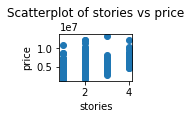

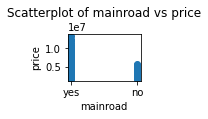

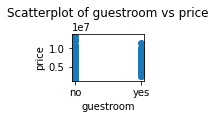

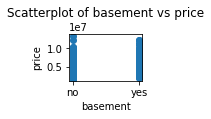

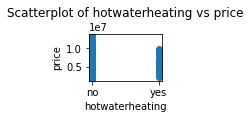

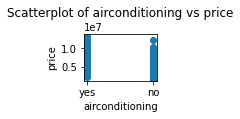

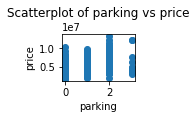

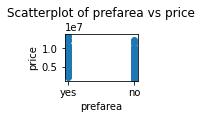

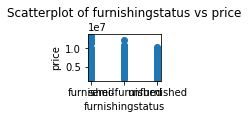

In [20]:
# Step 6: Data Visualization
import matplotlib.pyplot as plt
x_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
'basement', 'hotwaterheating', 'airconditioning', 'parking',
'prefarea', 'furnishingstatus']
y_vars = 'price'
plt.figure(figsize=(20, 20))
for i, vars in enumerate(x_vars):
    plt.subplot(4, 4, i+1)
    plt.scatter(df[vars], df[y_vars])
    plt.xlabel(vars)
    plt.ylabel('price')
    plt.title('Scatterplot of ' + vars + ' vs price')
    plt.show()


In [21]:
x=pd.get_dummies(x,drop_first=True)
print(x)

     area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
0    7420         4          2        3        2          True          False   
1    8960         4          4        4        3          True          False   
2    9960         3          2        2        2          True          False   
3    7500         4          2        2        3          True          False   
4    7420         4          1        2        2          True           True   
..    ...       ...        ...      ...      ...           ...            ...   
540  3000         2          1        1        2          True          False   
541  2400         3          1        1        0         False          False   
542  3620         2          1        1        0          True          False   
543  2910         3          1        1        0         False          False   
544  3850         3          1        2        0          True          False   

     basement_yes  hotwater

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [24]:
y_pred=model.predict(x_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2_score=r2_score(y_test,y_pred)

print(f"MAE:{mae},MSE:{mse},R2:{r2_score}")

MAE:970043.403920164,MSE:1754318687330.6628,R2:0.6529242642153186


In [25]:
#print the coffecient of all columns
coffect=pd.DataFrame(model.coef_,x.columns,columns=['coeffient'])
print(coffect)

                                    coeffient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
parking                          2.248419e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
basement_yes                     3.902512e+05
hotwaterheating_yes              6.846499e+05
airconditioning_yes              7.914267e+05
prefarea_yes                     6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05
